# Snow Depth and Snow Cover Data Exploration 

## Overview

This tutorial demonstrates how to access and compare coincident snow data from in-situ Ground Pentrating Radar (GPR) measurements, and airborne and satellite platforms from NASA's SnowEx, ASO, and MODIS data sets. All data are available from the NASA National Snow and Ice Data Center Distributed Active Archive Center (NSIDC DAAC). 

## What you will learn in this tutorial

In this tutorial you will learn:

1. what snow data and information is available from NSIDC and the resources available to search and access this data;
2. how to search and access spatiotemporally coincident data across in-situ, airborne, and satellite observations.
3. how to read SnowEx GPR data into a Geopandas GeoDataFrame;
4. how to read ASO snow depth data from GeoTIFF files using xarray;
5. how to read MODIS Snow Cover data from HDF-EOS files using xarray;
6. how to subset gridded data using a bounding box;
5. how to extract and visualize raster values at point locations;
6. how to save output as shapefile.

## Snow data and resources at NSIDC DAAC
<!-- 
[The National Snow and Ice Data Center](https://nsidc.org) provides over 1100 data sets covering the Earth's cryosphere and more, all of which are available to the public free of charge. NSIDC creates supports data users, creates tools for data access, performs scientific research, and educates the public about the cryosphere. 

#### Selected NSIDC DAAC and NASA Data Resources

* [NSIDC Data Search](https://nsidc.org/data/search/#keywords=snow)
    * Search NSIDC snow data
* [NSIDC Data Update Announcements](https://nsidc.org/the-drift/data-update/) 
    * News and tips for data users
* [NASA Earthdata Search](http://search.earthdata.nasa.gov/)
    * Search and access data across the NASA Earthdata
* [NASA Worldview](https://worldview.earthdata.nasa.gov/)
    * Interactive interface for browsing full-resolution, global, daily satellite images
    
    
#### Snow Today

[Snow Today](https://nsidc.org/snow-today), a collaboration with the University of Colorado's Institute of Alpine and Arctic Research (INSTAAR), provides near-real-time snow analysis for the western United States and regular reports on conditions during the winter season. Snow Today is funded by NASA Hydrological Sciences Program and utilizes data from the Moderate Resolution Imaging Spectroradiometer (MODIS) instrument and snow station data from the Snow Telemetry (SNOTEL) network by the Natural Resources Conservation Service (NRCS), United States Department of Agriculture (USDA) and the California Department of Water Resources: www.wcc.nrcs.usda.gov/snow.

### Snow-related missions and data sets featured in this tutorial: -->

In this tutorial we use snow depth and snow cover data collected on the Grand Mesa, Colorado, during NASA's SnowEx 2017 campaign.  [SnowEx]() was a multi-year field experiment to collect an extensive set of measurements of snow cover characteristics and conditions, in conjunction with airborne and satellite data, to assess the ability of different remote sensing techniques to measure snow pack characteristics in a variety of snow environments.

We use snow depths estimated from surface-based ground penetrating radar (GPR) and the Airborne Snow Observatory (ASO) airborne lidar, and fractional snow cover area retrieved from the MODIS/Terra satellite.  The links to the dataset landing pages are below.

| Dataset | Short Name | Version | Landing Page URL |
|---------|------------|---------|------------------|
| SnowEx17 Ground Penetrating Radar | SNEX17_GPR | 2 | https://doi.org/10.5067/G21LGCNLFSC5 |
| ASO L4 Lidar Snow Depth 3m UTM Grid | ASO_3M_SD | 1 | https://doi.org/10.5067/KIE9QNVG7HP0 |
| MODIS/Terra Snow Cover Daily L3 Global 500m SIN Grid | MOD10A1 | 6 | https://doi.org/10.5067/MODIS/MOD10A1.006 |

<!-- * [SnowEx](https://nsidc.org/data/snowex)
    * SnowEx17 Ground Penetrating Radar, Version 2: https://doi.org/10.5067/G21LGCNLFSC5
* [ASO](https://nsidc.org/data/aso)
    * ASO L4 Lidar Snow Depth 3m UTM Grid, Version 1: https://doi.org/10.5067/KIE9QNVG7HP0
* [MODIS](https://nsidc.org/data/modis)
    * MODIS/Terra Snow Cover Daily L3 Global 500m SIN Grid, Version 6: https://doi.org/10.5067/MODIS/MOD10A1.006
 -->
<!-- data_dict = { 'snowex': {'short_name': '','version': '2','polygon': polygon,'temporal':temporal},
                'aso': {'short_name': 'ASO_3M_SD','version': '1','polygon': polygon,'temporal':temporal},
             'modis': {'short_name': 'MOD10A1','version': '6','polygon': polygon,'temporal':temporal}
            }
 -->
 <!-- 
#### Other relevant snow products:

In addition to the three datasets featured in this tutorial, NSIDC hosts many other snow datasets.  A selection is listed below.

* [VIIRS Snow Data](http://nsidc.org/data/search/#sortKeys=score,,desc/facetFilters=%257B%2522facet_sensor%2522%253A%255B%2522Visible-Infrared%2520Imager-Radiometer%2520Suite%2520%257C%2520VIIRS%2522%255D%252C%2522facet_parameter%2522%253A%255B%2522SNOW%2520COVER%2522%252C%2522Snow%2520Cover%2522%255D%257D/pageNumber=1/itemsPerPage=25)

* [AMSR-E and AMSR-E/AMSR2 Unified Snow Data](http://nsidc.org/data/search/#sortKeys=score,,desc/facetFilters=%257B%2522facet_sensor%2522%253A%255B%2522Advanced%2520Microwave%2520Scanning%2520Radiometer-EOS%2520%257C%2520AMSR-E%2522%252C%2522Advanced%2520Microwave%2520Scanning%2520Radiometer%25202%2520%257C%2520AMSR2%2522%255D%252C%2522facet_parameter%2522%253A%255B%2522SNOW%2520WATER%2520EQUIVALENT%2522%252C%2522Snow%2520Water%2520Equivalent%2522%255D%257D/pageNumber=1/itemsPerPage=25)

* [MEaSUREs Snow Data](http://nsidc.org/data/search/#keywords=measures/sortKeys=score,,desc/facetFilters=%257B%2522facet_parameter%2522%253A%255B%2522SNOW%2520COVER%2522%255D%252C%2522facet_sponsored_program%2522%253A%255B%2522NASA%2520National%2520Snow%2520and%2520Ice%2520Data%2520Center%2520Distributed%2520Active%2520Archive%2520Center%2520%257C%2520NASA%2520NSIDC%2520DAAC%2522%255D%252C%2522facet_format%2522%253A%255B%2522NetCDF%2522%255D%252C%2522facet_temporal_duration%2522%253A%255B%252210%252B%2520years%2522%255D%257D/pageNumber=1/itemsPerPage=25)
  
* [Near-Real-Time SSM/I-SSMIS EASE-Grid Daily Global Ice Concentration and Snow Extent (NISE), Version 5](https://doi.org/10.5067/3KB2JPLFPK3R)
-->

## Import Packages

We will start by importing the packages we use in this tutorial.

In [71]:
# For search and access
import earthaccess

# For reading SnowEx GPR data
import pandas as pd 
import geopandas as gpd
from shapely.geometry import Polygon, Point, box #, mapping

# For reading ASO and MODIS
import xarray as xr
import rioxarray

# For Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Miscellaneous imports
import dateutil
import numpy as np

## Data Discovery

We start by identifying the study area and time-range using the spatial and temporal coverage of the SnowEx GPR surveys and then searching for ASO and MODIS data collected for the same time and area. 

<!-- NASA Earthdata Search can be used to visualize the coverage over mulitple data sets and to access the same data you will be working with below: 
https://search.earthdata.nasa.gov/projects?projectId=5366449248
 -->

### Get study area and time-range for SnowEx GPR

The NASA SnowEx 2017 field experiment was conducted on the Grand Mesa, Colorado.  Observations were collected between September 2016 and July 2017, with an intensive observing period from 6 February to 25 February, 2017.  

There are a number of ways to get the spatial coverage of this dataset.

1. Use the Spatial Coverage of the dataset from the [Overview](https://nsidc.org/data/snex17_gpr/versions/2#anchor-overview) section of the dataset landing page.
2. Draw a polygon for your area of interest on the map in the [Data Access Tool](https://nsidc.org/data/data-access-tool/SNEX17_GPR/versions/2) for the data.
3. Retrieve the bounding polygon from the collection metadata using the `earthaccess` package.

#### Method 1. Use Spatial Coverage from dataset landing page

The Overview section of the SnowEx17 GPR dataset landing page gives the **Spatial Coverage** of the data collection.

<img align="left" src="data_landing_page_overview.png">

We can see that the latitude and longitude ranges for the collection are:
- 39.11115 N to 38.9935 N  
- -108.22367 E to -107.85785 E  

To define create a bounding box that can be passed to `earthaccess`, we simply copy these values into a Python tuple in the order 

```
(lower_left_longitude, lower_left_latitude, upper_right_longitude, upper_right_latitude)
```

For the values above this is

In [1]:
roi_bbox = (-108.22367, 39.11115, -107.85785, 38.9935)

#### Method 2. Draw and export a region of interest using the Data Access Tool map

NSIDC's Data Access Tool allows you to draw and export a polygon to define your region of interest.  To go to the Data Access Tool, click on "Data Access and Tools" in the menu on the right side of the dataset landing page.  Then select "Data Access Tool".

<img align="left" src="Data-download-polygon-export.png">

Click on the Polygon Drawing button and create a polygon by clicking on the map to add points.  Finish drawing the polygon by clicking on the first point you added.  The shape of the polygon can be edited by dragging the points.

To export the polygon, click on the "Floppy Disk" icon.  The polygon is exported as a GeoJSON file.  An example is shown below.

```
{
  "type": "Feature",
  "geometry": {
    "type": "Polygon",
    "coordinates": [
      [
        [
          -108.2352445938561,
          38.98556907427165
        ],
        [
          -107.85284607930835,
          38.978765032966244
        ],
        [
          -107.85494925720668,
          39.10596902171742
        ],
        [
          -108.22772795408136,
          39.11294532581687
        ],
        [
          -108.2352445938561,
          38.98556907427165
        ]
      ]
    ]
  },
  "properties": {}
}
```

An example polygon geojson file is provided in the /Data folder of this repository.

We can use Geopandas to read the GeoJSON file.  This returns a Geopandas GeoSeries.

In [3]:
roi_polygon_gdf = gpd.read_file('Data/nsidc-polygon.json')
roi_polygon_gdf

,geometry
0,"POLYGON ((-108.23524 38.98557, -107.85285 38.9..."


To define a polygon for `earthaccess`, we create a list of tuples from the GeoSeries.

_check that earthaccess checks orientation_

In [4]:
roi_polygon = [tuple(xy.values) for _, xy in roi_polygon_gdf.get_coordinates().iterrows()]
roi_polygon

[(-108.2352445938561, 38.98556907427165),
 (-107.85284607930835, 38.978765032966244),
 (-107.85494925720668, 39.10596902171742),
 (-108.22772795408136, 39.11294532581687),
 (-108.2352445938561, 38.98556907427165)]

#### Method 3. Retrieve Spatial Coverage from metdata using `earthaccess`

`earthaccess.search_datasets` returns a list of objects containing metadata for datasets found.  This metadata contains the spatial extent of the dataset.

We search for the SnowEx17 GPR dataset using `earthaccess`.  This has the shortname "SNEX17_GPR".  We want version 2.

In [68]:
r = earthaccess.search_datasets(
    short_name = "SNEX17_GPR",
    version = '2',
)

Datasets found: 1


This returns a single dataset as a Python list with length 1.  The metadata object contained in the list is a mixture of nested Python dictionaries and lists.  You can inspect the structure by typing `print(r[0])`.

_Add a description of UMM-C and UMM-G to CookBook_

For the SnowEx17 GPR dataset, spatial extent is described as a bounding box.  It can be found at:

```
umm/SpatialExtent/HorizontalSpatialDomain/Geometry/BoundingRectangles
```

We translate this path into the keys of a nested Python dictionary, as we do in the code cell below.  The value of `BoundingRectangles` is a list because there can be more than one bounding rectangle.  However, in this case, we know there is only one bounding rectangle, so we get the first element of that list.  Also note that we have to get the first element of the results `r` from `search_datasets`. 

In [69]:
spatial_coverage = r[0]['umm']['SpatialExtent']['HorizontalSpatialDomain']['Geometry']['BoundingRectangles'][0]
spatial_coverage

{'WestBoundingCoordinate': -108.22367,
 'NorthBoundingCoordinate': 39.11115,
 'EastBoundingCoordinate': -107.85785,
 'SouthBoundingCoordinate': 38.9935}

The `BoundingRectangle` is returned as a dictionary.  We have to transform this into a tuple `(xmin, ymin, xmax, ymax)` that is expected by `earthaccess`.

In [7]:
roi_bbox = (
    spatial_coverage['WestBoundingCoordinate'],
    spatial_coverage['SouthBoundingCoordinate'],
    spatial_coverage['EastBoundingCoordinate'],
    spatial_coverage['NorthBoundingCoordinate']
)
roi_bbox

(-108.22367, 38.9935, -107.85785, 39.11115)

We will use this `roi_bbox` as a keyword argument to `earthaccess.search_data` when we search for ASO and MODIS data.

### Search for Data

Now that we have a bounding box for the SnowEx17 GPR we can start to look for ASO and MODIS data.  First, we will see what GPR data are available.  We do this using `earthaccess.search_data`.  This is similar to `earthaccess.search_datasets` but looks for data files (also called granules) instead of datasets.

We could use our region of interest bounding box or polygons but we don't need these for the SnowEx17 GPR data because we know this data is in pretty much the same location.  So we just supply the dataset short name and version.

In [8]:
snowex_result = earthaccess.search_data(
    short_name = "SNEX17_GPR",
    version = '2',
)

Granules found: 3


There are three files found.  We can get some basic information about these files.

In [9]:
[display(result) for result in snowex_result]

Collection: {'EntryTitle': 'SnowEx17 Ground Penetrating Radar V002'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Longitude': -108.06789, 'Latitude': 39.05189}, {'Longitude': -108.07092, 'Latitude': 39.04958}, {'Longitude': -108.13422, 'Latitude': 39.02644}, {'Longitude': -108.18504, 'Latitude': 39.04032}, {'Longitude': -108.2211, 'Latitude': 39.0357}, {'Longitude': -108.21534, 'Latitude': 39.01719}, {'Longitude': -108.18261, 'Latitude': 38.99637}, {'Longitude': -108.11049, 'Latitude': 39.00562}, {'Longitude': -108.06225, 'Latitude': 39.02413}, {'Longitude': -108.06213, 'Latitude': 39.03338}, {'Longitude': -108.08619, 'Latitude': 39.02876}, {'Longitude': -108.05301, 'Latitude': 39.04264}, {'Longitude': -108.05289, 'Latitude': 39.05189}, {'Longitude': -108.06786, 'Latitude': 39.0542}, {'Longitude': -108.06789, 'Latitude': 39.05189}]}}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2017-02-08T00:00:00.000Z', 'EndingDateTime': '2017-02-10T23:59:59.000Z'}}
Size(MB): 57.3195
Data: ['https://data.nsidc.earthdatacloud.nasa.gov/nsidc-cumulus-prod-protected/SNOWEX/SNEX17_GPR/2/2017/02/08/SnowEx17_GPR_Version2_Week1.csv']

Collection: {'EntryTitle': 'SnowEx17 Ground Penetrating Radar V002'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Longitude': -107.88943, 'Latitude': 39.10738}, {'Longitude': -107.89539, 'Latitude': 39.10738}, {'Longitude': -107.95508, 'Latitude': 39.0912}, {'Longitude': -108.02372, 'Latitude': 39.07271}, {'Longitude': -108.09234, 'Latitude': 39.0542}, {'Longitude': -108.16078, 'Latitude': 39.04264}, {'Longitude': -108.2113, 'Latitude': 39.0357}, {'Longitude': -108.2113, 'Latitude': 39.03338}, {'Longitude': -108.20533, 'Latitude': 39.0195}, {'Longitude': -108.18454, 'Latitude': 39.00099}, {'Longitude': -108.12811, 'Latitude': 39.00099}, {'Longitude': -108.08653, 'Latitude': 39.00099}, {'Longitude': -108.02094, 'Latitude': 39.02644}, {'Longitude': -107.94938, 'Latitude': 39.0357}, {'Longitude': -107.93155, 'Latitude': 39.02413}, {'Longitude': -107.89867, 'Latitude': 39.04726}, {'Longitude': -107.85677, 'Latitude': 39.08195}, {'Longitude': -107.86257, 'Latitude': 39.10507}, {'Longitude': -107.88644, 'Latitude': 39.10969}, {'Longitude': -107.88943, 'Latitude': 39.10738}]}}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2017-02-14T00:00:00.000Z', 'EndingDateTime': '2017-02-17T23:59:59.000Z'}}
Size(MB): 85.516
Data: ['https://data.nsidc.earthdatacloud.nasa.gov/nsidc-cumulus-prod-protected/SNOWEX/SNEX17_GPR/2/2017/02/14/SnowEx17_GPR_Version2_Week2.csv']

Collection: {'EntryTitle': 'SnowEx17 Ground Penetrating Radar V002'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Longitude': -108.06789, 'Latitude': 39.05189}, {'Longitude': -108.06792, 'Latitude': 39.04958}, {'Longitude': -108.08616, 'Latitude': 39.03107}, {'Longitude': -108.15531, 'Latitude': 39.0195}, {'Longitude': -108.14352, 'Latitude': 39.00331}, {'Longitude': -108.11049, 'Latitude': 39.00562}, {'Longitude': -108.05349, 'Latitude': 39.00562}, {'Longitude': -108.05334, 'Latitude': 39.01719}, {'Longitude': -108.02919, 'Latitude': 39.02876}, {'Longitude': -108.05586, 'Latitude': 39.0542}, {'Longitude': -108.06786, 'Latitude': 39.0542}, {'Longitude': -108.06789, 'Latitude': 39.05189}]}}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2017-02-21T00:00:00.000Z', 'EndingDateTime': '2017-02-25T23:59:59.000Z'}}
Size(MB): 66.3598
Data: ['https://data.nsidc.earthdatacloud.nasa.gov/nsidc-cumulus-prod-protected/SNOWEX/SNEX17_GPR/2/2017/02/21/SnowEx17_GPR_Version2_Week3.csv']

[None, None, None]

But to refine our search for coincident ASO and MODIS data, we need the beginning and end time and date of each GPR survey.  This is contained in the file metadata and we can access this in a similar way to how we got the spatial extent for the SnowEx data collection.

Below, we get the file name, beginning date and time, and ending date and time for each SnowEx17 GPR file found. 

In [10]:
for r in snowex_result:
    print(
        f"Granule-ID: {r['umm']['GranuleUR']}\n",
        f"     Begin: {r['umm']['TemporalExtent']['RangeDateTime']['BeginningDateTime']}\n"
        f"       End: {r['umm']['TemporalExtent']['RangeDateTime']['EndingDateTime']}\n"
)

Granule-ID: SnowEx17_GPR_Version2_Week1.csv
      Begin: 2017-02-08T00:00:00.000Z
       End: 2017-02-10T23:59:59.000Z

Granule-ID: SnowEx17_GPR_Version2_Week2.csv
      Begin: 2017-02-14T00:00:00.000Z
       End: 2017-02-17T23:59:59.000Z

Granule-ID: SnowEx17_GPR_Version2_Week3.csv
      Begin: 2017-02-21T00:00:00.000Z
       End: 2017-02-25T23:59:59.000Z



For the rest of the tutorial, we are going to focus on the GPR survey collected in week 1 and compare snow depths retrieved from this survey with snow depth from ASO and snow cover fraction from MODIS.

We'll set a temporal range for the ASO and MODIS data searches using the beginning and ending datetimes for the week 1 survey.  We could do this by copying the dates by hand but this means that if you want to change the date range of the search you have to find the cell with the dates and manually change them.  It is better to automate the process.  This also avoids cut-and-paste mistakes. 

To facilitate this, we will create a `survey_id` variable with a value `0`.  Then if we want to use a different survey, we can just change the `survey_id` value.

In [11]:
survey_id = 0

We extract the beginning and ending datetimes for the first survey.

In [12]:
begin_datetime = snowex_result[survey_id]['umm']['TemporalExtent']['RangeDateTime']['BeginningDateTime']
end_datetime = snowex_result[survey_id]['umm']['TemporalExtent']['RangeDateTime']['EndingDateTime']

Now we can create a `temporal_range` that we can use in searches for ASO and MODIS.  

We'll parse the `begin_datetime` and `end_datetime` into `datetime` objects using the `dateutil` package.  This avoids inputting incorrect formats to the `earthaccess` and CMR search.

In [13]:
temporal_range = (
    dateutil.parser.isoparse(begin_datetime), 
    dateutil.parser.isoparse(end_datetime)
)
temporal_range

(datetime.datetime(2017, 2, 8, 0, 0, tzinfo=tzutc()),
 datetime.datetime(2017, 2, 10, 23, 59, 59, tzinfo=tzutc()))

#### Search for ASO Flightlines

Now that we have a region of interest and a date range defined, we can search for coincident ASO and MODIS data. 

From table [_add ref_] we now that the `short_name` for the ASO data is `ASO_3M_SD` and we want version 1.

In [14]:
aso_result = earthaccess.search_data(
    short_name = "ASO_3M_SD",
    version = '1',
    bounding_box = roi_bbox,
    temporal = temporal_range,
)

Granules found: 1


This returns one granule.

In [15]:
display(aso_result[0])

Collection: {'EntryTitle': 'ASO L4 Lidar Snow Depth 3m UTM Grid V001'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Longitude': -108.35131, 'Latitude': 38.77793}, {'Longitude': -107.53149, 'Latitude': 38.79858}, {'Longitude': -107.54845, 'Latitude': 39.27213}, {'Longitude': -108.37374, 'Latitude': 39.25112}, {'Longitude': -108.35131, 'Latitude': 38.77793}]}}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2017-02-08T00:00:00.010Z', 'EndingDateTime': '2017-02-08T23:59:59.590Z'}}
Size(MB): 1689.92
Data: ['https://data.nsidc.earthdatacloud.nasa.gov/nsidc-cumulus-prod-protected/ASO/ASO_3M_SD/1/2017/02/08/ASO_3M_SD_USCOGM_20170208.tif']

#### Search for MODIS Snow Cover Data



In [16]:
modis_result = earthaccess.search_data(
    short_name = "MOD10A1",
    version = "61",
    bounding_box = roi_bbox,
    temporal = temporal_range,
    cloud_hosted=True
)

Granules found: 3


There are three MODIS scenes.  We can use display again to see an overview of the results.

In [17]:
[display(r) for r in modis_result]

Collection: {'EntryTitle': 'MODIS/Terra Snow Cover Daily L3 Global 500m SIN Grid V061'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Longitude': -92.131858571552, 'Latitude': 29.9009502428382}, {'Longitude': -104.256722414513, 'Latitude': 40.0742066197196}, {'Longitude': -117.486656023174, 'Latitude': 39.9999999964079}, {'Longitude': -103.835851753394, 'Latitude': 29.8360532722546}, {'Longitude': -92.131858571552, 'Latitude': 29.9009502428382}]}}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2017-02-08T00:00:00.000Z', 'EndingDateTime': '2017-02-08T23:59:59.000Z'}}
Size(MB): 9.52992
Data: ['https://data.nsidc.earthdatacloud.nasa.gov/nsidc-cumulus-prod-protected/MODIS/MOD10A1/61/2017/02/08/MOD10A1.A2017039.h09v05.061.2021265053227.hdf']

Collection: {'EntryTitle': 'MODIS/Terra Snow Cover Daily L3 Global 500m SIN Grid V061'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Longitude': -92.131858571552, 'Latitude': 29.9009502428382}, {'Longitude': -104.256722414513, 'Latitude': 40.0742066197196}, {'Longitude': -117.486656023174, 'Latitude': 39.9999999964079}, {'Longitude': -103.835851753394, 'Latitude': 29.8360532722546}, {'Longitude': -92.131858571552, 'Latitude': 29.9009502428382}]}}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2017-02-09T00:00:00.000Z', 'EndingDateTime': '2017-02-09T23:59:59.000Z'}}
Size(MB): 8.04295
Data: ['https://data.nsidc.earthdatacloud.nasa.gov/nsidc-cumulus-prod-protected/MODIS/MOD10A1/61/2017/02/09/MOD10A1.A2017040.h09v05.061.2021265174122.hdf']

Collection: {'EntryTitle': 'MODIS/Terra Snow Cover Daily L3 Global 500m SIN Grid V061'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Longitude': -92.131858571552, 'Latitude': 29.9009502428382}, {'Longitude': -104.256722414513, 'Latitude': 40.0742066197196}, {'Longitude': -117.486656023174, 'Latitude': 39.9999999964079}, {'Longitude': -103.835851753394, 'Latitude': 29.8360532722546}, {'Longitude': -92.131858571552, 'Latitude': 29.9009502428382}]}}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2017-02-10T00:00:00.000Z', 'EndingDateTime': '2017-02-10T23:59:59.000Z'}}
Size(MB): 9.25648
Data: ['https://data.nsidc.earthdatacloud.nasa.gov/nsidc-cumulus-prod-protected/MODIS/MOD10A1/61/2017/02/10/MOD10A1.A2017041.h09v05.061.2021266011855.hdf']

[None, None, None]

## Access and Read the Data

In this section we are going to access the data granules and read granules into data objects for visualization and analysis.  A data object, in this context, is a Python data structure that contains the data values and associated metadata, and has a set of methods associated with it.  

We have three datasets.  The SnowEx GPR has three surveys but we are going to use the survey from the first week.  There is one temporal and spatially coincident ASO snow depth data granule, and three MODIS scenes. From the results summaries we can see that the data is in three different file formats.  SnowEx GPR is a CSV file.  ASO snow depth is a GeoTIFF.  The MODIS snow cover data are in HDF files.  In fact this is HDF-EOS.  We will use the Pandas, Geopandas and xarray Python packages to read these data granules.

All the datasets we are working with are in the cloud.  For the SnowEx ~and ASO~ datasets, rather than downloading the data, we will _stream_ the data loading it directly into memory.  Unfortunately, we cannot use this method for the MODIS snow cover data because the nested group structure of HDF-EOS does not allow this kind of access.  

If you are working on a local machine and would rather download the data, use the following command, specifying the list of results returned by `earthaccess.search_data` and the local download path:
```
earthaccess.download(<list_of_results>, local_path=<local_download_path>)
```


### SnowEx GPR

SnowEx GPR data have the `.csv` file extension, indicating that they are comma-delimited.  This is not entirely true.  Unfortunately, files in this data collection have inconsistent formatting.  `SnowEx17_GPR_Version2_Week1.csv` and `SnowEx17_GPR_Version2_Week2.csv` are tab-delimted.  `SnowEx17_GPR_Version2_Week3.csv` is comma-delimted.

We demonstrate reading week 1 but show the code below to read weeks 2 and 3.

To read `SnowEx17_GPR_Version2_Week1.csv` and `SnowEx17_GPR_Version2_Week2.csv` use 
```
pd.read_csv(<file_name>, sep='\t')
```
To read `SnowEx17_GPR_Version2_Week3.csv` use
```
pd.read_csv(<file_name>)
```

To _stream_ the data, we first have to open a link to the remote file system.

In [18]:
f_snex = earthaccess.open(snowex_result)  # Open all the results

Opening 3 granules, approx size: 0.2 GB


QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

This returns a _list_ of _file-like objects_, that we can read using `pandas.read_csv`.  In this example, we have opened all three SnowEx granules but we only read the granule for week into a `pandas.DataFrame`.

In [19]:
%%time
df = pd.read_csv(f_snex[survey_id], sep='\t')  # f_snex[0] is week1 and tab-delimited
df.head()

CPU times: user 763 ms, sys: 203 ms, total: 966 ms
Wall time: 13.1 s


,collection,trace,long,lat,elev,twtt,Thickness,SWE,x,y,UTM_Zone
0,GPR_0042_020817,2581,-108.066856,39.043146,3240.2,5.89,0.692,225,753854.880092,4.325659e+06,12 S
1,GPR_0042_020817,2582,-108.066856,39.043146,3240.2,5.89,0.692,225,753854.899385,4.325660e+06,12 S
2,GPR_0042_020817,2583,-108.066856,39.043146,3240.2,5.87,0.690,224,753854.918686,4.325660e+06,12 S
3,GPR_0042_020817,2584,-108.066855,39.043146,3240.2,5.86,0.689,224,753854.937987,4.325660e+06,12 S
4,GPR_0042_020817,2585,-108.066855,39.043147,3240.2,5.84,0.686,223,753854.957280,4.325660e+06,12 S


Data for the week 1 survey were collected over multiple days between 2017-02-08 and 2017-02-10.  Because we want to find temporally coincident data, we need to subset by day.  

There is no timestamp in the data but the day that data were collected is encoded in the _collection_ name column.  We will create new index containing the day of collection so that we can subset the data.

We use the `re` package to perform a regular expression search and to extract the date portion of a collection name.  This date-string is then converted to a DateTime object using the `datetime` package.  This is written as the function `collection_to_date`.  We then apply this function to the _collection_ column and assign the result as the index of the DataFrame.

In [20]:
import re
import datetime as dt

def collection_to_date(x):
    date_str = re.search(r'GPR_\d{4}_(\d{6})', x)
    if date_str:
        return dt.datetime.strptime(date_str.groups(0)[0], "%m%d%y")

df.index = df.collection.apply(collection_to_date)
df.head()

,collection,trace,long,lat,elev,twtt,Thickness,SWE,x,y,UTM_Zone
collection,,,,,,,,,,,
2017-02-08,GPR_0042_020817,2581,-108.066856,39.043146,3240.2,5.89,0.692,225,753854.880092,4.325659e+06,12 S
2017-02-08,GPR_0042_020817,2582,-108.066856,39.043146,3240.2,5.89,0.692,225,753854.899385,4.325660e+06,12 S
2017-02-08,GPR_0042_020817,2583,-108.066856,39.043146,3240.2,5.87,0.690,224,753854.918686,4.325660e+06,12 S
2017-02-08,GPR_0042_020817,2584,-108.066855,39.043146,3240.2,5.86,0.689,224,753854.937987,4.325660e+06,12 S
2017-02-08,GPR_0042_020817,2585,-108.066855,39.043147,3240.2,5.84,0.686,223,753854.957280,4.325660e+06,12 S


pandas recognizes a DataFrame with a datetime index as a time series and allows a simple subsetting based on a date string.

In [21]:
df = df.loc["2017-02-08"]
df

,collection,trace,long,lat,elev,twtt,Thickness,SWE,x,y,UTM_Zone
collection,,,,,,,,,,,
2017-02-08,GPR_0042_020817,2581,-108.066856,39.043146,3240.20,5.89,0.692,225,753854.880092,4.325659e+06,12 S
2017-02-08,GPR_0042_020817,2582,-108.066856,39.043146,3240.20,5.89,0.692,225,753854.899385,4.325660e+06,12 S
2017-02-08,GPR_0042_020817,2583,-108.066856,39.043146,3240.20,5.87,0.690,224,753854.918686,4.325660e+06,12 S
2017-02-08,GPR_0042_020817,2584,-108.066855,39.043146,3240.20,5.86,0.689,224,753854.937987,4.325660e+06,12 S
2017-02-08,GPR_0042_020817,2585,-108.066855,39.043147,3240.20,5.84,0.686,223,753854.957280,4.325660e+06,12 S
...,...,...,...,...,...,...,...,...,...,...,...
2017-02-08,GPR_0043_020817,98131,-108.066826,39.043153,3242.82,5.58,0.656,213,753857.428230,4.325660e+06,12 S
2017-02-08,GPR_0043_020817,98132,-108.066826,39.043152,3242.82,5.56,0.653,212,753857.421581,4.325660e+06,12 S
2017-02-08,GPR_0043_020817,98133,-108.066826,39.043152,3242.81,5.47,0.643,209,753857.414932,4.325660e+06,12 S


As you can see in the table above, the index is the same for every row.  For future analysis, we want a unique index.  So we reset the index to a unique numeric index.  We set the name of the index first to preserve the date information for future work.

In [22]:
df.index.name = "date"
df = df.reset_index()

For plotting and analysis, we create a `geopandas.GeoDataFrame`.  A `GeoFataFrame` is similar to and supports all the functionality of a `pandas.DataFrame` but it has a `geometry` column and methods that allow GIS-like operations, such as spatial joins, intersections, etc.  We create the `geometry` for the `GeoDataFrame` from the latitude and longitude columns.

The SnowEx data does have projected x and y coordinates.  However, in some files, these coordinates are for different UTM zones, which makes plotting and reprojection for the whole DataFrame difficult.  Latitude and longitude are in a consistent CRS, WGS-84 (EPSG:4326).

```{note}
The `UTM_Zone` column gives the UTM zone as `12 S`.  This is wrong and should be `12 N` for the northern hemisphere UTM zone 12.
```

In [23]:
snowex_gpr = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.long, df.lat, crs=4326))
snowex_gpr.head()

,date,collection,trace,long,lat,elev,twtt,Thickness,SWE,x,y,UTM_Zone,geometry
0,2017-02-08,GPR_0042_020817,2581,-108.066856,39.043146,3240.2,5.89,0.692,225,753854.880092,4.325659e+06,12 S,POINT (-108.06686 39.04315)
1,2017-02-08,GPR_0042_020817,2582,-108.066856,39.043146,3240.2,5.89,0.692,225,753854.899385,4.325660e+06,12 S,POINT (-108.06686 39.04315)
2,2017-02-08,GPR_0042_020817,2583,-108.066856,39.043146,3240.2,5.87,0.690,224,753854.918686,4.325660e+06,12 S,POINT (-108.06686 39.04315)
3,2017-02-08,GPR_0042_020817,2584,-108.066855,39.043146,3240.2,5.86,0.689,224,753854.937987,4.325660e+06,12 S,POINT (-108.06686 39.04315)
4,2017-02-08,GPR_0042_020817,2585,-108.066855,39.043147,3240.2,5.84,0.686,223,753854.957280,4.325660e+06,12 S,POINT (-108.06686 39.04315)


We now have a georeferenced set of survey points that we can plot. 

<Axes: >

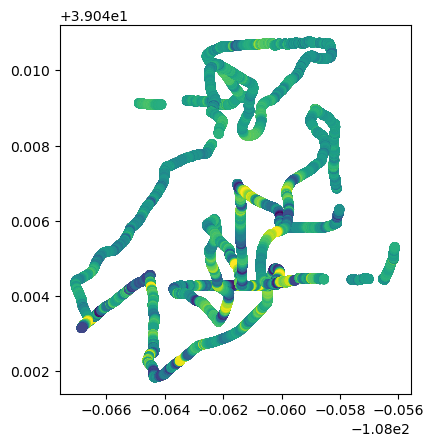

In [24]:
snowex_gpr.plot("Thickness")

### Open and Read ASO Snow Depth Data

<!-- As with the SnowEx GPR data, we will _stream_ the ASO data and open it directly into memory.
 -->
ASO data are GeoTIFFs.  We can use `xarray.open_dataset` with `engine=rasterio` to open a GeoTIFF.  We set `chunks='auto'` to allow _out-of-memory_ operations.  The `squeeze` method removes dimensions of length 1.

In [26]:
%%time
# f_aso = earthaccess.open(aso_result)
f_aso = earthaccess.download(aso_result, local_path="download")

aso = xr.open_dataset(f_aso[0], engine='rasterio', masked=True, chunks='auto').squeeze(drop=True)
aso

 Getting 1 granules, approx download size: 1.65 GB


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

File ASO_3M_SD_USCOGM_20170208.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 34.5 ms, sys: 4.11 ms, total: 38.6 ms
Wall time: 36.1 ms


<xarray.Dataset> Size: 2GB
Dimensions:      (x: 23765, y: 17534)
Coordinates:
  * x            (x) float64 190kB 2.089e+05 2.089e+05 ... 2.802e+05 2.802e+05
  * y            (y) float64 140kB 4.35e+06 4.35e+06 ... 4.297e+06 4.297e+06
    spatial_ref  int64 8B ...
Data variables:
    band_data    (y, x) float32 2GB dask.array<chunksize=(1411, 23765), meta=np.ndarray>

### Open and Read MODIS Snow Cover

At this time, `xarray` cannot read HDF-EOS file-like objects.  _Don't ask me why_.  So we need to download the MODIS file.  The downloaded files are written to the `download` directory.

In [27]:
%%time
f_modis = earthaccess.download(modis_result, local_path='download')

 Getting 3 granules, approx download size: 0.03 GB


QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

File MOD10A1.A2017039.h09v05.061.2021265053227.hdf already downloaded
File MOD10A1.A2017040.h09v05.061.2021265174122.hdf already downloaded
File MOD10A1.A2017041.h09v05.061.2021266011855.hdf already downloaded


PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

CPU times: user 13.1 ms, sys: 2.03 ms, total: 15.2 ms
Wall time: 12.8 ms


HDF-EOS is a hierachical data format.  Data variables are organized into groups that mimic a direcory structure.  To find the data we want, we need to know something about the groups in the files.  This can be found in the MOD10A1 User Guide section 1.2.2.

<add figure>

Looking at this figure, we can see that the data are in the "MOD_Grid_Snow_500m" group.

Another way to discover this information is to use `gdalinfo`.  Uncomment (Ctrl/) and run the cell below.  If we scroll to the Subdataset section, there is a list of SUBDATASETs.  You can interpret these as `<filepath>:<group>:<data-variable>`

In [28]:
# !gdalinfo {f_modis[0]}  # The {var} syntax is used to pass a variable in a jupyter notebook to a shell command

We set `group="MOD_Grid_Snow_500m"` to tell xarray to get the data in this group.  `engine="rasterio"` tells `xarray` to use `rasterio`, actually GDAL, to read the file.

In [29]:
%%time
modis = xr.open_dataset(f_modis[0], group="MOD_Grid_Snow_500m", engine="rasterio", chunks="auto").squeeze()
modis

CPU times: user 58 ms, sys: 4.23 ms, total: 62.3 ms
Wall time: 62 ms


<xarray.Dataset> Size: 161MB
Dimensions:                             (x: 2400, y: 2400)
Coordinates:
    band                                int64 8B 1
  * x                                   (x) float64 19kB -1.001e+07 ... -8.89...
  * y                                   (y) float64 19kB 4.448e+06 ... 3.336e+06
    spatial_ref                         int64 8B ...
Data variables:
    NDSI_Snow_Cover                     (y, x) float32 23MB dask.array<chunksize=(2400, 2400), meta=np.ndarray>
    NDSI_Snow_Cover_Basic_QA            (y, x) float32 23MB dask.array<chunksize=(2400, 2400), meta=np.ndarray>
    NDSI_Snow_Cover_Algorithm_Flags_QA  (y, x) float32 23MB dask.array<chunksize=(2400, 2400), meta=np.ndarray>
    NDSI                                (y, x) float32 23MB dask.array<chunksize=(2400, 2400), meta=np.ndarray>
    Snow_Albedo_Daily_Tile              (y, x) float32 23MB dask.array<chunksize=(2400, 2400), meta=np.ndarray>
    orbit_pnt                           (y, x) float32 23MB dask.array<chunksize=(2400, 2400), meta=np.ndarray>
    granule_pnt                         (y, x) float32 23MB dask.array<chunksize=(2400, 2400), meta=np.ndarray>
Attributes: (12/94)
    ALGORITHMPACKAGEACCEPTANCEDATE:     12-2005
    ALGORITHMPACKAGEMATURITYCODE:       Normal
    ALGORITHMPACKAGENAME:               MOD_PR10A1
    ALGORITHMPACKAGEVERSION:            5
    ASSOCIATEDINSTRUMENTSHORTNAME.1:    MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:      Terra
    ...                                 ...
    SOUTHBOUNDINGCOORDINATE:            29.9999999973059
    SPSOPARAMETERS:                     none
    TileID:                             51009005
    VERSIONID:                          61
    VERTICALTILENUMBER:                 5
    WESTBOUNDINGCOORDINATE:             -117.486656023174

We now have an `xarray.Dataset` containing the MODIS data.

<!-- ## Clip ASO Data to 500 m Buffer Around Mesa Lakes SNOTEL site -->
## Clip ASO Data to the bounding-box of the SnowEx GPR data

The ASO data are large.  The data can be clipped to a smaller region of interest using the `clip` method for `rioxarray.DataSets`.   As an example, we will _clip_ the ASO data from 8 February to the bounding box of the SnowEx GPR survey, using the `rioxarray` `clip` method.

The first step is to define the clip region.  There are several ways to do this.  Here, we use the `total_bounds` attribute for the `snowex_gpr` `GeoDataFrame`.

Before we define the bounding box, we need to make sure that the ASO data and SnowEx GPR data are in the same CRS.  We use the `to_crs` method to reproject the GPR data to the CRS for ASO.  We can use the `rio` accessor to get the ASO crs

```
aso.rio.crs
```

The `rioxarray` `clip` method expects a list of geometry objects, in this case a bounding box.  We use a `shapely.geometry.box` to create a bounding box geometry object.  `box` expects for values defining _minimum-x_, _minimum-y_, _maximum-x_, and _maximum-y_.  `total_bounds` returns a tuple.  We use the `*` operator to unpack the tuple returned by `total_bounds` into four values.  The `[]` are used to create a list with one element.
<!-- Here, we will use GeoPandas to create a `GeoSeries` containing a single point for the snotel. -->

<!-- The [Mesa Lakes SNOTEL](https://wcc.sc.egov.usda.gov/nwcc/site?sitenum=622) site is located at 39.05 N and -108.05 E.  _Where did this come from?_ -->

In [30]:
# The original tutorial created a buffer around the Mesa Lakes SNOTEL site.  
# Clipping to the GPR data makes more sense to me.  But I am leaving the code here for review.
# snotel = gpd.GeoSeries([Point(-108.067,39.05)], index=['Mesa Lakes'], crs="EPSG:4326")
# clip_region = snotel.to_crs(aso.rio.crs).buffer(1000)  # Original tutorial clips to 500 m buffer around Snotel

In [31]:
clip_region = [box(*snowex_gpr.to_crs(aso.rio.crs).total_bounds)]  # Clip for extent of survey data

We then use the `rioxarray` `clip` method to crop the ASO data.

In [32]:
aso_cropped = aso.rio.clip(clip_region)

#### Plot ASO and SnowEx GPR snow depth, and SNOTEL location

We can plot the ASO Lidar snow depth and the GPR snow depth to compare the two datasets.  We plot this as a map showing the raster ASO snow depth overlaid with the GPR snow depth.

For any comparison plot, we want to make sure that our two datasets have the same range for the color bar.  Here, we do this by getting the minimum and maximum values of the ASO data. 

In [33]:
vmin, vmax = (aso_cropped.band_data.min().values, aso_cropped.band_data.max().values)
vmin, vmax

(array(0., dtype=float32), array(4.0321507, dtype=float32))

Here, we plot the ASO raster and GPR snow depths, along with the location of the Mesa Lakes SNOTEL site.

We create a `matplotlib` figure and axis.  We then use the plot methods for the cropped ASO `xarray.DataArray`, and SNOTEL and SnowEx `geopandas.GeoDataFrame`.  Both the SNOTEL and SnowEx data are in WGS-84 but the ASO data are in UTM Zone 12 N.  We use the Geopandas `to_crs` with the CRS for the ASO data accessed using the `rioxarray` accessor for the crs attribute.  This avoids having to hard-code information and, hopefully, avoids mistakes.

To distinguish the ASO snow depth raster from the ASO snow depth points, the ASO data is lightened by setting `alpha=0.9` which reduces the saturation of the colors while retaining the hue so that the two datasets can be compared.

_DOES THIS WORK?  Can anyone think of a better way?_

The Mesa Lakes SNOTEL site is near to the GPR transect.  It is helpful to plot the location of this site for orientation.  To facilitate this, we create a `Geopandas.GeoSeries` containing the data point for that station.

In [34]:
snotel = gpd.GeoSeries([Point(-108.067,39.05)], index=['Mesa Lakes'], crs="EPSG:4326")

We can now create the plot.

Text(0.5, 1.0, 'Airborne lidar and GPR snow depths')

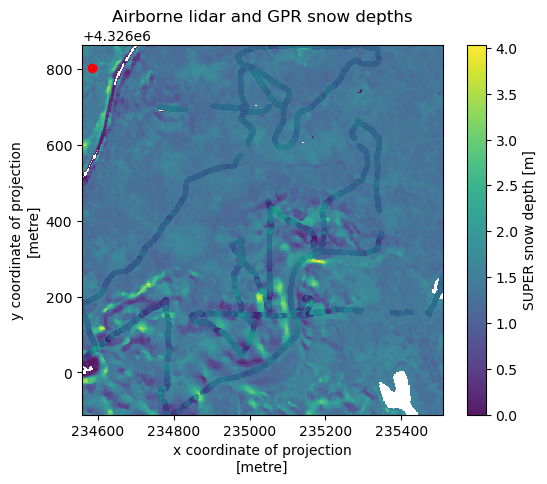

In [35]:
fig, ax = plt.subplots()
aso_cropped.band_data.plot(ax=ax, vmin=vmin, vmax=vmax, alpha=0.9)
snotel.to_crs(aso_cropped.rio.crs).plot(ax=ax, c='red')
snowex_gpr.to_crs(aso_cropped.rio.crs).plot('Thickness', ax=ax, s=5, vmin=vmin, vmax=vmax); #, edgecolor='0.25')
ax.set_title("Airborne lidar and GPR snow depths")

## Compare ASO and GPR snow depths along the survey transect

We can also compare ASO Lidar and SnowEx GPR measurements along the GPR transect in two ways.  First as a plot of snow depths along a transect.  Second with a scatter plot.

First, we extract the ASO data that corresponds to the GPR measurement points.  The GPR points and ASO grid do not match exactly, so we interpolate from the ASO grid points to the GPR measurement points.

We use _vectorized_ indexing to select data that correspond to the SnowEx GPR points by passing `x` and `y` coordinates as `xarray.DataArray` objects.  `xarray.interp` interprets this input as selecting only the `(x,y)` points.  If we passed `x` and `y` as lists or `numpy.arrays`, interp would return a 2D surface.

In [36]:
x = xr.DataArray(snowex_gpr.to_crs(aso_cropped.rio.crs).geometry.x)
y = xr.DataArray(snowex_gpr.to_crs(aso_cropped.rio.crs).geometry.y)

We then use the `xarray.Dataset.interp` method to interpolate ASO raster snow depths to the locations of GPR survey points.  `xarray.Dataset.interp` is a wrapper for [`scipy.interpolate.interpn`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interpn.html#scipy.interpolate.interpn).  We could use any one of several interpolation methods but choose the `linear` (bilinear in this case) method. 

This produces a 1D dataset of ASO snow depths for the GPR survey points.

In [37]:
aso_transect = aso.interp(x=x, y=y, method='linear')
aso_transect

<xarray.Dataset> Size: 5MB
Dimensions:      (dim_0: 163764)
Coordinates:
    spatial_ref  int64 8B ...
    x            (dim_0) float64 1MB 2.346e+05 2.346e+05 ... 2.346e+05 2.346e+05
    y            (dim_0) float64 1MB 4.326e+06 4.326e+06 ... 4.326e+06 4.326e+06
  * dim_0        (dim_0) int64 1MB 0 1 2 3 4 ... 163760 163761 163762 163763
Data variables:
    band_data    (dim_0) float32 655kB dask.array<chunksize=(163764,), meta=np.ndarray>

We can now add the ASO snow depth data to the `snowex_gpr` `GeoDataFrame`. 

In [38]:
snowex_gpr["ASO"] = aso_transect.band_data.to_pandas()
snowex_gpr[["date","long","lat","Thickness","SWE","ASO"]].head()  # Just show coordinates and snow data

,date,long,lat,Thickness,SWE,ASO
0,2017-02-08,-108.066856,39.043146,0.692,225,0.725680
1,2017-02-08,-108.066856,39.043146,0.692,225,0.726302
2,2017-02-08,-108.066856,39.043146,0.690,224,0.726953
3,2017-02-08,-108.066855,39.043146,0.689,224,0.727630
4,2017-02-08,-108.066855,39.043147,0.686,223,0.728338


<Axes: >

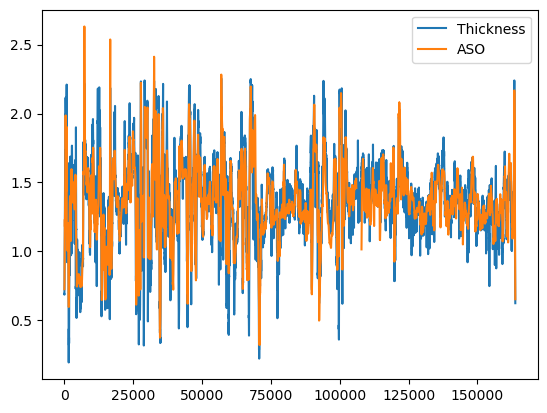

In [39]:
snowex_gpr[["Thickness", "ASO"]].plot()

We can also compare the snow depths on a scatterplot

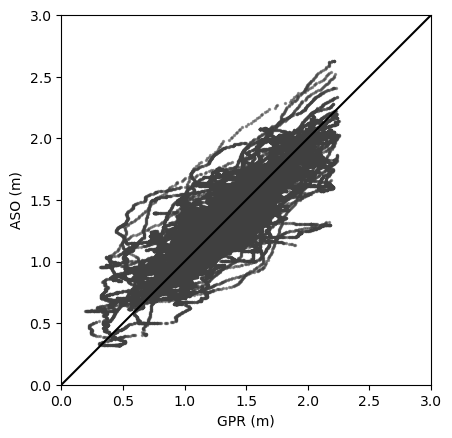

In [40]:
fig, ax = plt.subplots()
ax.scatter(snowex_gpr.Thickness, aso_transect.band_data, c='0.25', s=2, alpha=0.5)
ax.set_xlabel('GPR (m)')
ax.set_ylabel('ASO (m)')
ax.set_xlim(0,3)
ax.set_ylim(0,3)
ax.set_aspect('equal')
ax.axline((0.,0.), slope=1., c='k')

## Plot MODIS Snow

Now, let's take a look at the MODIS data.  We want to explore snow cover fraction.  In the MOD10A1 dataset, snow cover fraction as a percentage is calculated from NDSI and stored in the `NDSI_Snow_Cover` variable.  By clicking on the file icon on the row for this variable in the dataset view below, we can see that the data variable doesn't just contain snow cover fraction but also has coded data values for missing data and other quality flags.

In [74]:
modis

<xarray.Dataset> Size: 161MB
Dimensions:                             (x: 2400, y: 2400)
Coordinates:
    band                                int64 8B 1
  * x                                   (x) float64 19kB -1.001e+07 ... -8.89...
  * y                                   (y) float64 19kB 4.448e+06 ... 3.336e+06
    spatial_ref                         int64 8B ...
Data variables:
    NDSI_Snow_Cover                     (y, x) float32 23MB dask.array<chunksize=(2400, 2400), meta=np.ndarray>
    NDSI_Snow_Cover_Basic_QA            (y, x) float32 23MB dask.array<chunksize=(2400, 2400), meta=np.ndarray>
    NDSI_Snow_Cover_Algorithm_Flags_QA  (y, x) float32 23MB dask.array<chunksize=(2400, 2400), meta=np.ndarray>
    NDSI                                (y, x) float32 23MB dask.array<chunksize=(2400, 2400), meta=np.ndarray>
    Snow_Albedo_Daily_Tile              (y, x) float32 23MB dask.array<chunksize=(2400, 2400), meta=np.ndarray>
    orbit_pnt                           (y, x) float32 23MB dask.array<chunksize=(2400, 2400), meta=np.ndarray>
    granule_pnt                         (y, x) float32 23MB dask.array<chunksize=(2400, 2400), meta=np.ndarray>
Attributes: (12/94)
    ALGORITHMPACKAGEACCEPTANCEDATE:     12-2005
    ALGORITHMPACKAGEMATURITYCODE:       Normal
    ALGORITHMPACKAGENAME:               MOD_PR10A1
    ALGORITHMPACKAGEVERSION:            5
    ASSOCIATEDINSTRUMENTSHORTNAME.1:    MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:      Terra
    ...                                 ...
    SOUTHBOUNDINGCOORDINATE:            29.9999999973059
    SPSOPARAMETERS:                     none
    TileID:                             51009005
    VERSIONID:                          61
    VERTICALTILENUMBER:                 5
    WESTBOUNDINGCOORDINATE:             -117.486656023174

We will plot snow cover fraction for the MODIS image over the western USA.  We use a combination of `matplotlib` and `cartopy`.  I use the Albers Equal Area projection with projection parameters for the contiguous USA.

MODIS data are in the [MODIS Sinusoidal Grid](https://modis-land.gsfc.nasa.gov/GCTP.html).  This uses a Sinusoidal projection, which a pseudocylindrical equal area projection.  To plot the data correctly using `cartopy`, we need to define the CRS for the MODIS Sinusoidal projection.  We can access the CRS for the data using the `rioxarray` accessor.  Here, we print this as proj4 string.

In [42]:
modis.rio.crs.to_proj4()

'+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +R=6371007.181 +units=m +no_defs=True'

We can learn a few things about the MODIS Sinusoidal projection from this.  The `+lon_0=0` tells us that the central longitude is $0\ ^{\circ}E$.  `+x_0` and `+y_0` are the false Easting and false Northing, which are both zero.  The `+R=6371007.181` is the semimajor axis of the Spheroid.  You can see a list of Proj4 parameters [here](https://proj.org/en/stable/usage/index.html) 

`cartopy.crs` has a Sinusoidal projection.  Looking at the Docstring for `cartopy.crs.Sinusoidal`, we can see that the projection uses a default Globe.  The `Globe` object defines the datum and ellipsoid used for the CRS and projection.  Looking at the [cartopy documentation for [`cartopy.crs.Globe`](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.crs.Globe.html) the default ellipse is WGS84.  So we can't use the `cartopy.crs.Sinusoidal` projection _out-of-the-box_, we have to create a projection using the projection parameters for the MODIS Sinusoidal projection.

In [43]:
modis_projection = ccrs.Sinusoidal(
    globe=ccrs.Globe(semimajor_axis=modis.rio.crs['R'], ellipse="sphere"),
    )

In [44]:
modis_projection

<Projected CRS: +proj=sinu +ellps=sphere +a=6371007.181 +lon_0=0.0 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Sinusoidal
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Greenwich


To show snow cover fraction and missing data, we use color normalization to map only the values between 0.001 and 100 to the Blues colormap.  We then use the Colormap object to set values less than 0.001% to transparent.

```
p.axes.cmap.set_under("none")
```

Values greater than 100 are set to a dark grey to indicate where clouds were detected or where QA was not passed.

```
p.axes.cmap.set_over("0.25")
```

To add orientation we add state and country boundaries, along with the coastline.

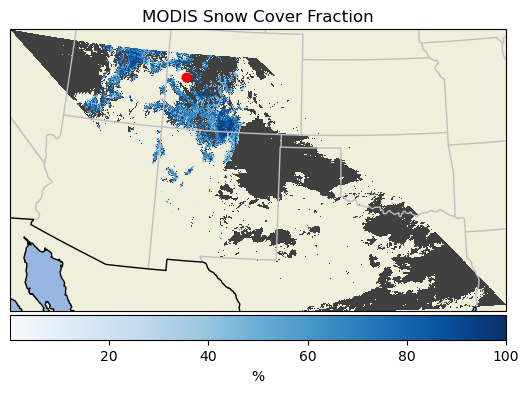

In [73]:
# Get state boundaries
states = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

# Set map projection to Albers Equal Area with
# projection parameters for contiguous US
# From Snyder (https://pubs.usgs.gov/pp/1395/report.pdf)
map_proj = ccrs.AlbersEqualArea(
    central_longitude=-100., 
    central_latitude=40., 
    standard_parallels=(29.5, 45.5)) 

# Set colormap and normalization
norm = Normalize(vmin=0.001, vmax=100)
cmap = mpl.colormaps['Blues']
# cmap='Blues'

p = modis.NDSI_Snow_Cover.plot(
    subplot_kws=dict(projection=map_proj),
    transform=modis_projection,
    norm=norm,
    cmap=cmap,
    cbar_kwargs={"extend": "neither", "orientation": "horizontal", "label": "%", "pad": 0.01},
)
p.cmap.set_over("0.25")
p.cmap.set_under("none")
# p.cmap.colorbar_extend = False

# Add SNOTEL location
snotel.to_crs(map_proj).plot(ax=p.axes, c='red')

# p.axes.set_extent(roi_bounding_box, ccrs.PlateCarree())

# Add state boundaries
p.axes.add_feature(states, edgecolor="0.75")
p.axes.add_feature(cfeature.COASTLINE)
p.axes.add_feature(cfeature.BORDERS)
p.axes.add_feature(cfeature.OCEAN)
p.axes.add_feature(cfeature.LAND)

p.axes.set_title("MODIS Snow Cover Fraction");

## Plot MODIS Snow Cover for GPR Survey Region

_I am not sure if we use just use this section and delete the preceding section.  If we use just this section, then I will copy some of the text from above here._

We want to be able to match MODIS snow cover fraction with the GPR Survey points.  A good first step is to visualize the MODIS data and GPR survey transect.  To do this, we'll clip the MODIS data to the bounding box of the survey data, using a similar approach to clipping the ASO data.

We define the bounding box of the SnowEx GPR data.  In this case, we transform the SnowEx data to the MODIS coordinate system before clipping.  We could skip this step and pass the SnowEx CRS to `clip` but this creates some missing values in the resulting clipped dataset because the clip region in WGS84 is a parallelagram when viewed in the MODIS Sinusoidal CRS.

In [75]:
clip_region = [box(*snowex_gpr.to_crs(modis.rio.crs).total_bounds)]
snow_cover_clipped = modis.NDSI_Snow_Cover.rio.clip(clip_region, all_touched=True)

_Text explaining MODIS Sinusoidal to be added here_

In [ ]:
modis_projection = ccrs.Sinusoidal(
    globe=ccrs.Globe(semimajor_axis=modis.rio.crs['R'], ellipse="sphere"),
    )

map_proj = modis_projection

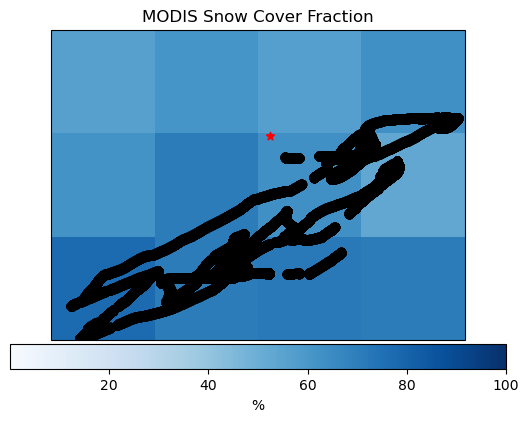

In [83]:
# Define based on search polygon
coords = roi_polygon_gdf.to_crs(map_proj.to_wkt()).geometry.get_coordinates()
roi_bbox_map = [coords.x.min(), coords.y.min(), coords.x.max(), coords.y.max()]

norm = Normalize(vmin=0.001, vmax=100)
# cmap = Colormap('Blues')
cmap='Blues'

# p = modis.NDSI_Snow_Cover.rio.clip(box(*roi_bbox_map)).plot(
p = snow_cover_clipped.plot(
    subplot_kws=dict(projection=map_proj),
    transform=modis_projection,
    norm=norm,
    cmap=cmap,
    cbar_kwargs={
        "extend": "neither", 
        "orientation": "horizontal", 
        "label": "%", 
        "pad": 0.01},
)
p.cmap.set_over("0.25")
p.cmap.set_under("none")

# Add SNOTEL location
snotel.to_crs(map_proj).plot(ax=p.axes, marker="*", c='red')
snowex_gpr.to_crs(map_proj).plot(ax=p.axes, c="k")

p.axes.set_title("MODIS Snow Cover Fraction");

## Extract Snow Cover From Modis for GPR Survey

We can use a similar approach to the one we used to extract the ASO snow thickness to extract snow cover fraction.  However, in this case we are going to select the values for MODIS pixels nearest to the survey points.

We first convert the x and y coordinates of the survey points to the MODIS CRS. 

In [49]:
x = xr.DataArray(snowex_gpr.to_crs(modis.rio.crs).geometry.x, dims=["point"])
y = xr.DataArray(snowex_gpr.to_crs(modis.rio.crs).geometry.y, dims=["point"])

The we use the `sel` method to extract the nearest data points.

In [50]:
modis_snow_cover_point = modis.NDSI_Snow_Cover.sel(x=x, y=y, method="nearest")

In [51]:
modis_snow_cover_point

<xarray.DataArray 'NDSI_Snow_Cover' (point: 163764)> Size: 655kB
dask.array<vindex-merge, shape=(163764,), dtype=float32, chunksize=(163764,), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
    x            (point) float64 1MB -9.333e+06 -9.333e+06 ... -9.333e+06
    y            (point) float64 1MB 4.341e+06 4.341e+06 ... 4.341e+06 4.341e+06
    spatial_ref  int64 8B ...
  * point        (point) int64 1MB 0 1 2 3 4 ... 163760 163761 163762 163763
Attributes:
    Key:          0-100=NDSI snow, 200=missing data, 201=no decision, 211=nig...
    long_name:    NDSI snow cover from best observation of the day
    units:        none
    valid_range:  0, 100

In [52]:
snowex_gpr["modis_snow_cover"] = modis_snow_cover_point.to_pandas()

In [54]:
snowex_gpr.head()

,date,collection,trace,long,lat,elev,twtt,Thickness,SWE,x,y,UTM_Zone,geometry,ASO,modis_snow_cover
0,2017-02-08,GPR_0042_020817,2581,-108.066856,39.043146,3240.2,5.89,0.692,225,753854.880092,4.325659e+06,12 S,POINT (-108.06686 39.04315),0.725680,77.0
1,2017-02-08,GPR_0042_020817,2582,-108.066856,39.043146,3240.2,5.89,0.692,225,753854.899385,4.325660e+06,12 S,POINT (-108.06686 39.04315),0.726302,77.0
2,2017-02-08,GPR_0042_020817,2583,-108.066856,39.043146,3240.2,5.87,0.690,224,753854.918686,4.325660e+06,12 S,POINT (-108.06686 39.04315),0.726953,77.0
3,2017-02-08,GPR_0042_020817,2584,-108.066855,39.043146,3240.2,5.86,0.689,224,753854.937987,4.325660e+06,12 S,POINT (-108.06686 39.04315),0.727630,77.0
4,2017-02-08,GPR_0042_020817,2585,-108.066855,39.043147,3240.2,5.84,0.686,223,753854.957280,4.325660e+06,12 S,POINT (-108.06686 39.04315),0.728338,77.0


### Export SnowEx GeoDataFrame with ASO and MODIS snow cover to Shapefile

Finally, the dataframe can be exported as a shapefile for further analysis in GIS:

In [24]:
gdf_buffer = gdf_buffer.drop(columns=['date'])
gdf_buffer.to_file('snow-data-20170208.shp')

## Additional data imagery services

#### NASA Worldview and the Global Browse Imagery Service

NASA’s EOSDIS Worldview mapping application provides the capability to interactively browse over 900 global, full-resolution satellite imagery layers and then download the underlying data. Many of the available imagery layers are updated within three hours of observation, essentially showing the entire Earth as it looks “right now."

According to the [MOD10A1 landing page](https://nsidc.org/data/mod10a1), snow cover imagery layers from this data set are available through NASA Worldview. This layer can be downloaded as various image files including GeoTIFF using the snapshot feature at the top right of the page. This link presents the MOD10A1 NDSI layer over our time and area of interest: https://go.nasa.gov/35CgYMd. 

Additionally, the NASA Global Browse Imagery Service provides up to date, full resolution imagery for select NSIDC DAAC data sets as web services including WMTS, WMS, KML, and more. These layers can be accessed in GIS applications following guidance on the [GIBS documentation pages](https://wiki.earthdata.nasa.gov/display/GIBS/Geographic+Information+System+%28GIS%29+Usage). 